# Análisis Exploratorio

**¿Qué es el análisis exploratorio de datos?**

El análisis exploratorio de datos (*EDA, Exploratory Data Analysis*) es entender los datos resumiendo sus principales características, generalmente utilizando algún tipo de representación gráfica. Este es un paso muy importante para llegar a la modelización de los datos que luego se puede utilizar para aplicar Machine learning para algún tipo de análisis predictivo. Explorar los datos no es tarea sencilla, suele llevar una cantidad de tiempo considerable. A través del análisis exploratorio podemos definir claramente el problema.

**¿Cómo realizamos el análisis exploratorio?**

Bueno, esta es LA pregunta. Y lamentablemente como suele suceder en estos casos la respuesta es: Depende. Básicamente porque depende del conjunto de datos que se está analizando. No existe una receta que se aplique para todos los casos. La idea fundamental es aplicar diferentes herramientas y estrategias que permitan tener una mejor idea. Puede ser un proceso iterativo en donde cada ciclo hace que uno tenga mejor entendimiento.

**¿Qué datos vamos a explorar hoy?**

Hoy vamos a analizar datos sobre autos. El dataset tiene más de 10k registros con más de 10 columnas que detallan características de los autos como por ejemplo: el tipo de combustible que usan, la potencia del motor, la caja de trasmisión que usan, el consumo en ciudad y en ruta y mucho más. En este ejercicio vamos a explorar los datos y dejarlos listos para modelarlos.



---



## 1. Importamos los paquetes necesarios

A continuación tenemos los paquetes que vamos a utilizar en este ejercicio. Esto lo hacemos siempre al principio.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)



---



## 2. Cargamos la "data" en un "dataframe"

El dataset viene en un formato de archivo que se llama CSV (*comma separated values*). Es un archivo de texto plano donde cada registro se pone en una línea del mismo y cada columna es separada por comas. Es un formato muy simple que se utiliza muchísimo para el intercambio de datos. 

Cargar los datos en un *dataframe* es uno de los pasos más importantes en el análisis exploratorio. Pandas tiene un método que nos permite leer un archivo CSV y cargarlo directamente en un dataframe.

> **Google Colab**: para cargar el archivo CSV en Colab a la izquierda del notebook vas a ver un ícono de una carpeta. Si hacés click sobre esa carpeta te da la opción de subir el archivo. También podés ya tenerlo cargado en el Drive. 


![upload_csv_colab.png](attachment:upload_csv_colab.png)

Para leer el archivo tenemos que usar el método `read_csv` que viene con Pandas. Como argumento le tenemos que pasar el nombre del CSV, en este caso: `car-data.csv`. Como a Pandas lo importamos con el nombre `pd` tenemos que usar la siguiente sintaxis: 

In [2]:
df = pd.read_csv("car-data.csv")

Si Python no nos tiró ningún error, entonces ahora en la variable `df` tenemos un *dataframe* que tiene los datos que se leyeron del CSV.

Para ver los primeros 5 registros usamos el método `head` (cabeza):

In [3]:
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Si queremos ver los últimos 5 registros, usamos `tail` (cola):

In [4]:
df.tail(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


Y también podemos usar la función `len` para que nos diga cuántos registros tiene este *dataframe*:

In [5]:
len(df)

11914

O también podemos usar el atributo `shape` del *dataframe* que nos va a devolver una tupla con la cantidad de registros y la cantidad de columnas por registro:

In [6]:
df.shape

(11914, 16)

Y por último podemos usar el atributo `describe` del *dataframe* para conocer los estadísticos descriptivos básicos del dataframe como ser:

* count: Cantidad de valores no nulos
* mean: Media
* std: Desviación estandar
* min/25%/50%/75%/max: Valores mínimo, de percentiles 25, 50 y 75 y máximo.


In [7]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06




---



## 3. Revisando los tipos de datos de cada columna

Este paso es importante porque muchas veces por ejemplo, el precio o algún otro dato puede venir como una cadena de texto cuando en realidad queremos que sea un número de algún tipo. Si éste fuera el caso, tenemos que hacer la transformación del tipo de dato en la columna. 

En este caso en particular, por suerte, los datos vinieron correctamente.

In [8]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object



---



## 4. Eliminando columnas

Este paso es necesario en cada análisis exploratorio que vayas a realizar para evitar tener columnas en tu *dataframe* que no vayan a aportarte información en tu análisis. 

En este caso, a modo de ejemplo, podemos eliminar las columnas: Engine Fuel Type, Market Category, Vehicle style, Popularity, Number of doors, Vehicle Size.

In [9]:
df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1)
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500




---



## 5. Renombrando las columnas

En esta etapa lo que hacemos es ponerle un nombre que nos resulte más descriptivo. Muchas veces los datos vienen con nombres en las columnas un tanto confusos y siempre es mejor "explícito". Es un buen ejercicio que **mejora la legibilidad**.

In [10]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cilindros", "Transmission Type": "Transmision", "Driven_Wheels": "Tracción","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Precio" })
df.head(5)

,Make,Model,Year,HP,Cilindros,Transmision,Tracción,MPG-H,MPG-C,Precio
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500




---



## 6. Eliminando registros duplicados

Es altamente probable que en un dataset de +10k registros algunos de ellos se encuentren duplicados. Tener registros duplicados en nuestro análisis puede alterar los resultados y por ende, nuestras conclusiones y el modelo que proponemos.

Con `shape` vemos que actualmente el *dataframe* tiene 11914 registros con 10 columas.

In [11]:
df.shape

(11914, 10)

Eliminar los duplicados con un *dataframe* de Pandas es tan complejo como llamar al método `drop_duplicates`. Este médoto nos devuelve un *nuevo dataframe*, si no queremos tener un nuevo *dataframe* lo que hacemos es simplemente darle el mismo nombre al nuevo:

In [12]:
df = df.drop_duplicates()

In [13]:
df.shape

(10925, 10)

Ahora el *dataframe* tiene 10925 registros, es decir que había 989 registros duplicados.

In [15]:
11914 - 10925

989



---



## 7. Eliminando registros con valores incompletos

Los *dataframes* de Pandas tienen un método `count` que nos informa por columna cuántos registros tienen valores:

In [16]:
df.count()

Make           10925
Model          10925
Year           10925
HP             10856
Cilindros      10895
Transmision    10925
Tracción       10925
MPG-H          10925
MPG-C          10925
Precio         10925
dtype: int64

Este paso es muy similar al anterior, sólo que esta vez vamos a eliminar los registros que no tengan valores.
Es común en vez de eliminar estos registros, reemplazar los valores faltantes por el valor promedio. En este ejemplo, los valores faltantes están en el orden de las decenas mientras que tenemos un total de 10k registros. Es decir, el porcentaje es muy bajo y por eso optamos por descartar esos valores.

In [17]:
10925 - 10856

69

In [18]:
10925 - 10895

30

Notemos que en la columna `HP` tenemos 10856 registros con datos sobre un total de 10925. Es decir, hay 69 registros que no tienen un valor.
Y en la columna `Cilindros` tenemos 10895 registros con datos. Es decir, hay 30 registros que no tienen un valor. 

También podemos comprobarlo preguntándole al *dataframe* que nos diga si hay datos vacíos o en *null* y pidiéndole que nos haga la suma de esos:

In [19]:
df.isnull().sum()

Make            0
Model           0
Year            0
HP             69
Cilindros      30
Transmision     0
Tracción        0
MPG-H           0
MPG-C           0
Precio          0
dtype: int64

Para borrar esos registros que no tienen datos, registros que tienen "datos no disponibles" (del inglés *not available*) usamos el método `dropna`.

In [20]:
df = df.dropna()
df.count()

Make           10827
Model          10827
Year           10827
HP             10827
Cilindros      10827
Transmision    10827
Tracción       10827
MPG-H          10827
MPG-C          10827
Precio         10827
dtype: int64

Ahora nuestro dataset sabemos que no tiene registros duplicados y que todos nuestros registros tienen valores en las 10 columnas.

In [21]:
df.isnull().sum()

Make           0
Model          0
Year           0
HP             0
Cilindros      0
Transmision    0
Tracción       0
MPG-H          0
MPG-C          0
Precio         0
dtype: int64



---



## 8. Aplicando transformaciones


El origen de estos datos utiliza el sistema inglés. Por eso tenemos MPG, millas por galón. No sé ustedes, pero yo prefiero utilizar el sistema internacional. Sabiendo que 1 MPG equivale a 0.425144 KPL (Kilómetros por litro) podemos transformar esas columnas para hacer una mejor interpretación.

Si llamamos al *dataframe* con el nombre de una columna podemos operar con esa columna:

In [22]:
df["MPG-H"]

0        26
1        28
2        28
3        28
4        28
         ..
11909    23
11910    23
11911    23
11912    23
11913    26
Name: MPG-H, Length: 10827, dtype: int64

In [23]:
df["MPG-H"] = df["MPG-H"] * 0.425144

In [24]:
df["MPG-H"]

0        11.053744
1        11.904032
2        11.904032
3        11.904032
4        11.904032
           ...    
11909     9.778312
11910     9.778312
11911     9.778312
11912     9.778312
11913    11.053744
Name: MPG-H, Length: 10827, dtype: float64

Lo mismo hacemos para la columna `MPG-C`:

In [25]:
df["MPG-C"] = df["MPG-C"] * 0.425144
df["MPG-C"]

0        8.077736
1        8.077736
2        8.502880
3        7.652592
4        7.652592
           ...   
11909    6.802304
11910    6.802304
11911    6.802304
11912    6.802304
11913    7.227448
Name: MPG-C, Length: 10827, dtype: float64

Y ahora deberíamos cambiar el nombre, porque ese nombre ya no es significativo.

In [26]:
df = df.rename(columns={"MPG-H": "KPL-R", "MPG-C": "KPL-C"})
df.head(5)

,Make,Model,Year,HP,Cilindros,Transmision,Tracción,KPL-R,KPL-C,Precio
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,11.053744,8.077736,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,11.904032,8.077736,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,11.904032,8.502880,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,11.904032,7.652592,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,11.904032,7.652592,34500


## 9. Detectando valores atípicos

Un valor atípico es un punto o un set de puntos que son diferentes de otros en el dataset. A veces puede ser valores que están muy por debajo o muy por encima. En general suele ser una buena medida quitar estos valores que no resultan representativos. Estos valores atípicos suelen generar modelos que no resultan representativos. Es por ello que es una buena alternativa removerlos del dataset.  

Para la detección de valores atípicos en este caso vamos a utilizar una técnica que se llama *IQR score technique*, es decir, rango intercuartil. Los valores atípicos son muy fácil de detectar gráficamente ya que son puntos de la gráfica que se alejan mucho del dataset. 

Abajo vemos cómo con un simple gráfico podemos observar los valores atípicos. Veamos graficando las columnas de `Precio`, `Cilindros` y `HP`.

Si quieren más info sobre cómo detectar valores atípicos pueden ver el siguiente artículo de [towards data science](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba).

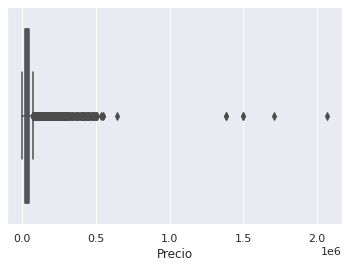

In [27]:
sns.boxplot(x=df['Precio'])

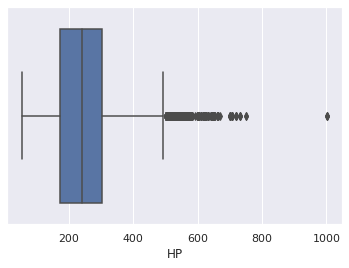

In [28]:
sns.boxplot(x=df['HP'])

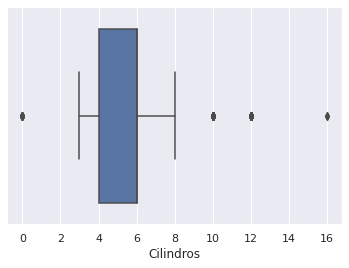

In [29]:
sns.boxplot(x=df['Cilindros'])

Analicemos la disperción del precio que como vimos antes tiene una cola larga hacia la derecha

In [30]:
df['Precio'].describe()

count    1.082700e+04
mean     4.249325e+04
std      6.229451e+04
min      2.000000e+03
25%      2.197250e+04
50%      3.084500e+04
75%      4.330000e+04
max      2.065902e+06
Name: Precio, dtype: float64

Como probablemente nadie pueda leer notación científica de forma rápida, veamoslo más claro:

Valor Mínimo:  2000 Media:  42493.25427172809 Máximo:  2065902
25%:  21972.5 50%:  42493.25427172809 75%:  43300.0
90%:  67208.0 98%:  67208.0


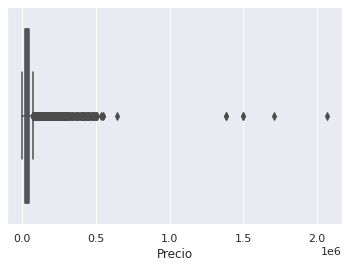

In [31]:
# veamoslo más claro

print("Valor Mínimo: ", df['Precio'].min(), "Media: ", df['Precio'].mean(), "Máximo: ", df['Precio'].max())
print("25%: ", df['Precio'].quantile(0.25), "50%: ", df['Precio'].mean(), "75%: ", df['Precio'].quantile(0.75))
print("90%: ", df['Precio'].quantile(0.90), "98%: ", df['Precio'].quantile(0.90))

sns.boxplot(x=df['Precio'])

Recortemos los outliers... por ejemplo, recortando entre 200 y el cuartil del 98% (67208 como vimos en la celda anterior)

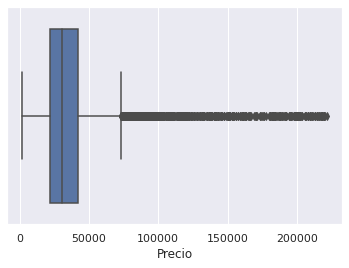

In [32]:
corte_inferior = 100
corte_superior = df["Precio"].quantile(0.98)

df = df[(df["Precio"] < corte_superior) & (df["Precio"] > corte_inferior)]

sns.boxplot(x=df['Precio'])

## 10. Gráficas

### Histograma

El histograma es una gráfica que representa la cantidad de ocurrencias de una variable en un intervalo determinado. En este dataset tenemos principalmente 10 diferentes marcas de fabricantes, pero es importante saber saber quién tiene la mayor cantidad de autos. Este histograma es una solución trivial para saber cuántos autos fabrica cada compañía.

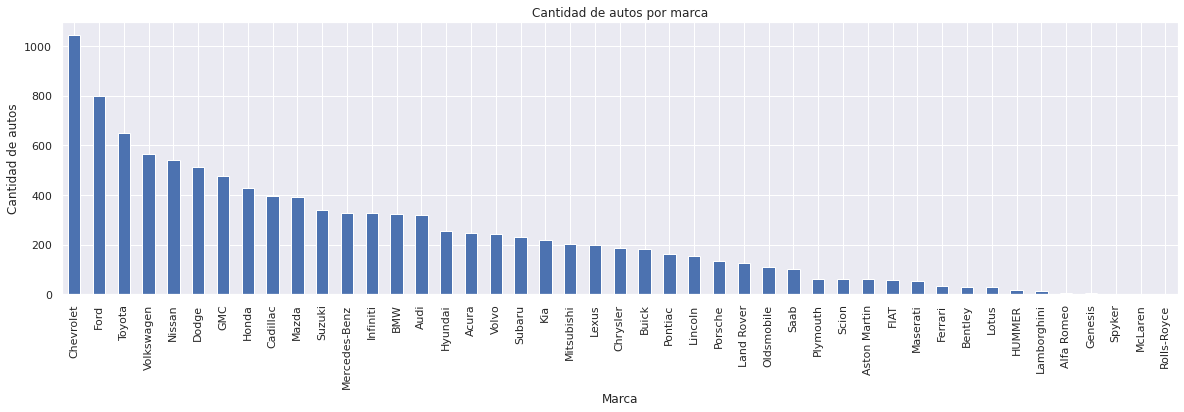

In [33]:
df.Make.value_counts().plot(kind='bar', figsize=(20,5))
plt.title("Cantidad de autos por marca")
plt.ylabel('Cantidad de autos')
plt.xlabel('Marca');

### Mapas de calor

Los mapas de calor son gráficas que sirven para determinar variables dependientes. Una de las mejores maneras para encontrar estas relaciones es utilizando un mapa de calor. En el siguiente mapa de calor encontramos que el precio es una característica dependiente del tamaño del motor, de la potencia y de la cantidad de cilindros.

,Year,HP,Cilindros,KPL-R,KPL-C,Precio
Year,1.000000,0.341624,-0.061565,0.288027,0.238074,0.406290
HP,0.341624,1.000000,0.751681,-0.394449,-0.451526,0.782439
Cilindros,-0.061565,0.751681,1.000000,-0.613523,-0.633368,0.527209
KPL-R,0.288027,-0.394449,-0.613523,1.000000,0.836345,-0.174628
KPL-C,0.238074,-0.451526,-0.633368,0.836345,1.000000,-0.218243
Precio,0.406290,0.782439,0.527209,-0.174628,-0.218243,1.000000


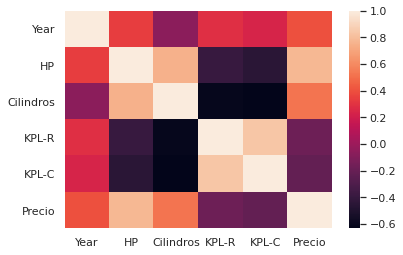

In [34]:
plt.figure()
correlaciones= df.corr()
sns.heatmap(correlaciones)
correlaciones

### Dispersión

Usamos este tipo de gráficas para encontrar correlación entre 2 variables. Acá graficamos precio en función de la potencia.
We generally use scatter plots to find the correlation between two variables. Here the scatter plots are plotted between Horsepower and Price and we can see the plot below. With the plot given below, we can easily draw a trend line. These features provide a good scattering of points.

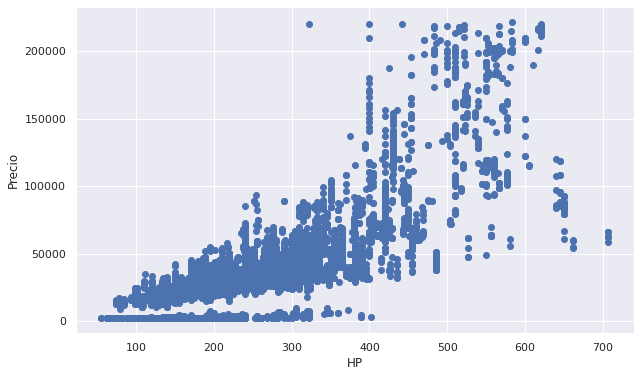

In [35]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Precio'])
ax.set_xlabel('HP')
ax.set_ylabel('Precio')
plt.show()

Con la gráfica anterior vemos que se puede trazar claramente una línea de tendencia. 

**Como vimos a lo largo de este ejercicio estos son algunos de los pasos que podemos realizar para un análisis exploratorio de datos. Hay mucho más cosas para hacer, pero por ahora esto consideramos que representa una muy buena introducción que brinda un panorama bastante amplio sobre la disciplina.**

**Sigan en contacto para más detalles**

## Gracias!

# #DataSchool